In [48]:
import numpy as np 
from scipy.stats import bernoulli
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns

%matplotlib inline

In [2]:
universe = ['face', 'cross']

In [3]:
p_face = 1/2

In [4]:
throw = bernoulli.rvs(p=p_face, size=100)

#sum(throw)

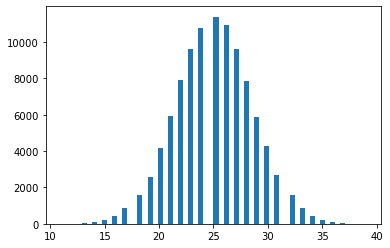

In [5]:
data_to_plot = binom.rvs(p=p_face, n=50, size=100000);
plt.hist(data_to_plot, bins=60);


In [6]:
pd.Series(data_to_plot).value_counts()/100000

25    0.11385
26    0.10908
24    0.10763
27    0.09617
23    0.09599
22    0.07922
28    0.07837
21    0.05954
29    0.05871
30    0.04253
20    0.04171
31    0.02667
19    0.02591
32    0.01575
18    0.01569
17    0.00885
33    0.00857
16    0.00446
34    0.00438
15    0.00230
35    0.00200
36    0.00088
14    0.00084
13    0.00034
37    0.00026
38    0.00013
12    0.00011
39    0.00004
11    0.00002
dtype: float64

In [12]:
df = pd.read_csv('bicicletas-compartidas.csv')
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [18]:
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x: f'Cat-{int(x)}')
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [23]:
valores, conteo_frecuencias = np.unique(ycat, return_counts=True)

tabla_de_frecuencias = dict(zip(valores, conteo_frecuencias))
tabla_de_frecuencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [27]:
#Numerical Variable

ynum = df['viento'].copy()
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [32]:
np.percentile(ynum, q=50)

15.0

In [36]:
np.median(ynum)

15.0

In [39]:
valores = [0,25,50,75,100]
valores_2 = list(range(0,110,10))
np.percentile(ynum, q = valores_2)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [40]:
b_comp_df = df['bicis-compartidas']
b_comp_df.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [46]:
#outlier
Q1 = np.percentile(ynum, q = 25)
Q3 = np.percentile(ynum, q = 75)

RI = Q3 - Q1

lim_inf = Q1 - 1.5 * RI
lim_sup = Q3 + 1.5 * RI

lim_inf, lim_sup

(-5.75, 36.25)

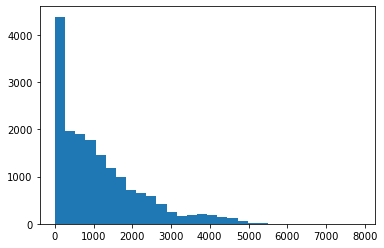

In [47]:
plt.hist(b_comp_df, bins=30);

## Variables Categoricas

In [49]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [50]:
cuartil_ano = df['cuartil-ano'].apply(lambda x: f'cuartil-{x}')

Text(0, 0.5, 'Frecuencias')

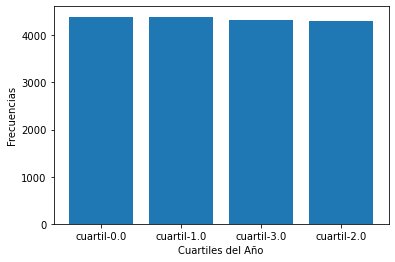

In [57]:
fig1, ax1 = plt.subplots()
ax1.bar(cuartil_ano.value_counts().index, cuartil_ano.value_counts())
ax1.set_xlabel('Cuartiles del Año')
ax1.set_ylabel('Frecuencias')

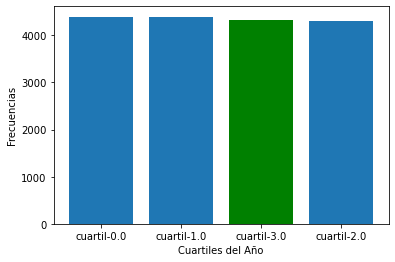

In [59]:
fig1, ax1 = plt.subplots()
ax1.bar(cuartil_ano.value_counts().index, cuartil_ano.value_counts())
ax1.set_xlabel('Cuartiles del Año')
ax1.set_ylabel('Frecuencias')
ax1.patches[2].set_facecolor('green')


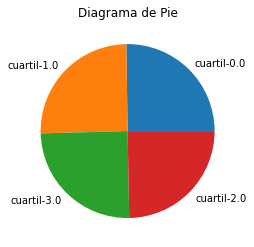

In [64]:
fig2, ax2 = plt.subplots()
ax2.pie(cuartil_ano.value_counts(), labels=cuartil_ano.value_counts().index);
ax2.set_title('Diagrama de Pie');

## Variables Numéricas

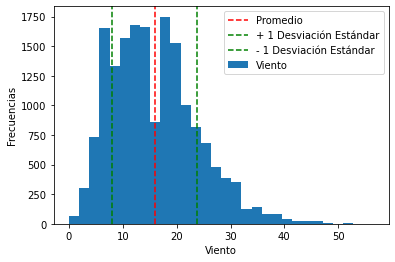

In [82]:
viento_df = df['viento']
fig3, ax3 = plt.subplots()
ax3.hist(viento_df, bins=30, label='Viento');
ax3.set_xlabel('Viento')
ax3.set_ylabel('Frecuencias')
plt.axvline(np.mean(viento_df), c='red', linestyle='--', label='Promedio')
plt.axvline(np.mean(viento_df) + np.std(viento_df), c='green', linestyle='--', label='+ 1 Desviación Estándar')
plt.axvline(np.mean(viento_df) - np.std(viento_df), c='green', linestyle='--', label='- 1 Desviación Estándar')
ax3.legend()

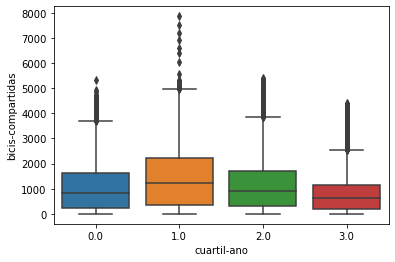

In [91]:
bicis_comp_df = df['bicis-compartidas']
fig4, ax4 = plt.subplots()
sns.boxplot(x= 'cuartil-ano' ,y= 'bicis-compartidas', data=df);

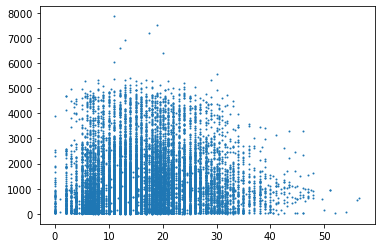

In [113]:
plt.plot(df['viento'], df['bicis-compartidas'], 'o', ms=1)